# Eksplorasi dan Pra-pemrosesan Data

Melakukan analisis data eksplorasi (EDA) pada dataset gambar cuaca. Memuat gambar, memvisualisasikannya, dan menguji setiap langkah dari pipeline pra-pemrosesan untuk memastikan semuanya berfungsi seperti yang diharapkan.

In [2]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from src.config import DATA_RAW_PATH, CLASSES, IMAGE_SIZE
from src.utils.dataset_loader import load_images_from_folder
from src.preprocessing.image_preprocessing import resize_image, to_grayscale, normalize_image

## Memuat Dataset

Memuat sebagian kecil dari dataset tanpa augmentasi untuk melihat distribusi data awal dan menampilkan beberapa sampel.

In [3]:
print(f"Mencari data di: {DATA_RAW_PATH}")

# Muat gambar tanpa augmentasi untuk eksplorasi
images, labels, filenames = load_images_from_folder(DATA_RAW_PATH, use_augmentation=False)

print(f"\nTotal gambar yang dimuat: {len(images)}")
print(f"Total label: {len(labels)}")

2025-09-30 19:21:08,039 - INFO - dataset_loader - Memuat gambar dari 'c:\Users\HP\Documents\PythonProjects\ML\klasifikasi-cuaca-svm\svm\data\raw'...


Mencari data di: c:\Users\HP\Documents\PythonProjects\ML\klasifikasi-cuaca-svm\svm\data\raw


Loading Sunrise: 100%|██████████| 357/357 [00:01<00:00, 283.97it/s]
2025-09-30 19:21:10,954 - INFO - dataset_loader - Total gambar yang berhasil dimuat (termasuk augmentasi): 1123



Total gambar yang dimuat: 1123
Total label: 1123


## Visualisasi Sampel Gambar

Menampilkan beberapa gambar acak dari setiap kelas untuk mendapatkan pemahaman visual tentang data.

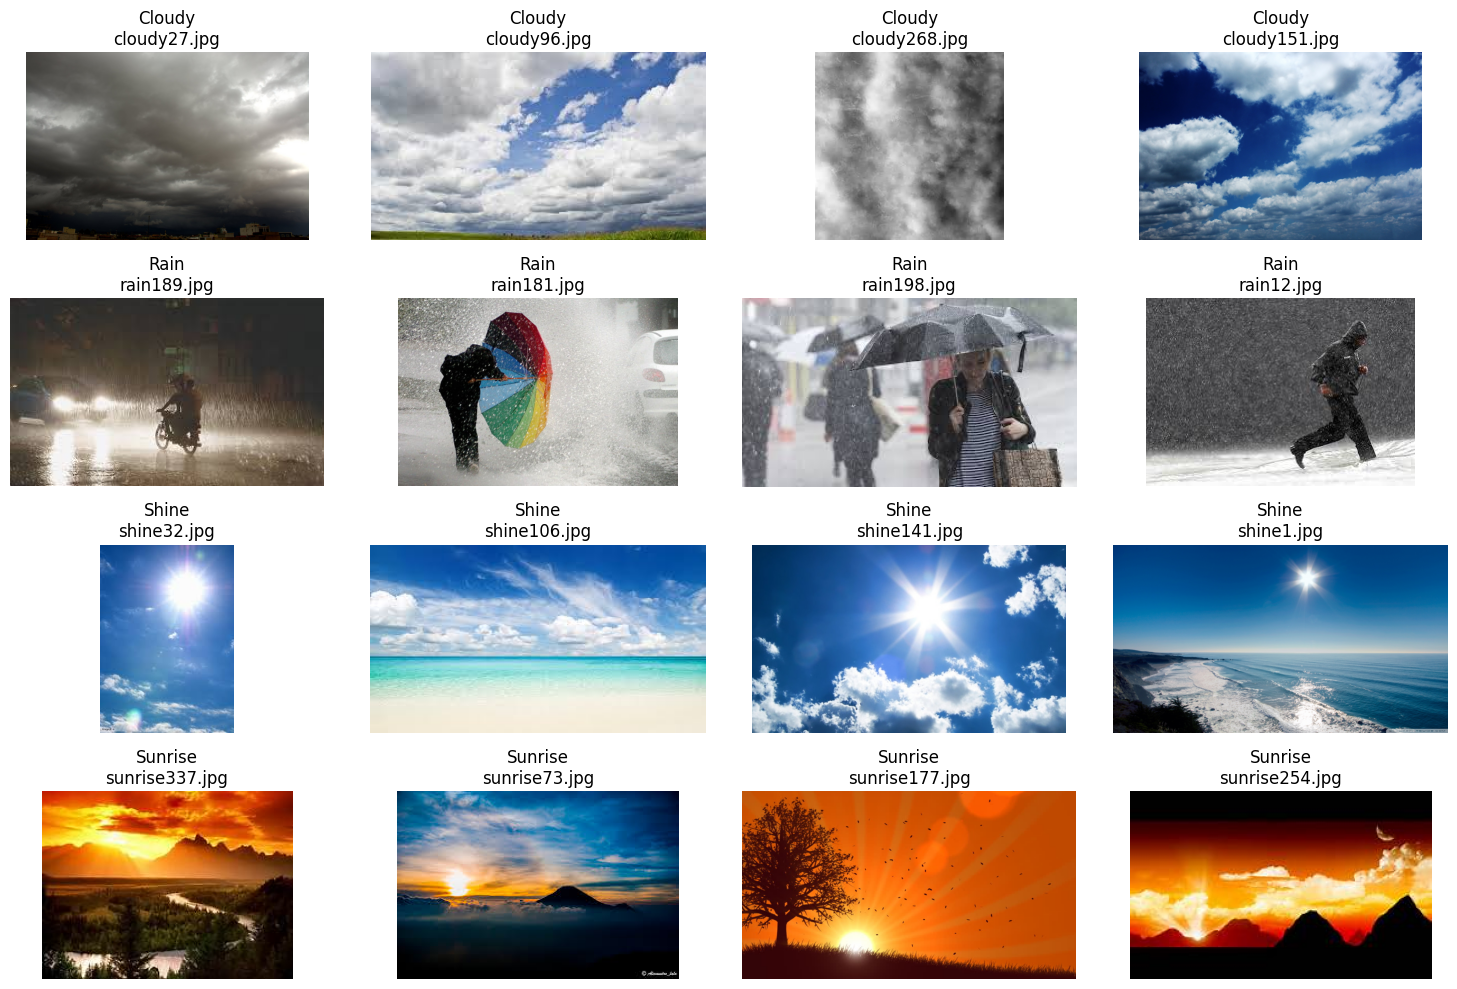

In [4]:
def show_sample_images(images, labels, num_samples=4):
    plt.figure(figsize=(15, 10))
    
    for i, class_name in enumerate(CLASSES):
        # Dapatkan indeks gambar untuk kelas saat ini
        class_indices = [idx for idx, label in enumerate(labels) if label == i]
        
        # Pilih sampel acak dari kelas ini
        if len(class_indices) > num_samples:
            sample_indices = random.sample(class_indices, num_samples)
        else:
            sample_indices = class_indices
            
        for j, img_idx in enumerate(sample_indices):
            plt.subplot(len(CLASSES), num_samples, i * num_samples + j + 1)
            # Konversi BGR (OpenCV) ke RGB (Matplotlib)
            img_rgb = cv2.cvtColor(images[img_idx], cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
            plt.title(f"{class_name}\n{filenames[img_idx]}")
            plt.axis('off')
            
    plt.tight_layout()
    plt.show()

show_sample_images(images, labels)

## Uji Coba Pra-pemrosesan

Mengambil satu gambar sampel dan menerapkan setiap fungsi pra-pemrosesan secara terpisah untuk melihat hasilnya.

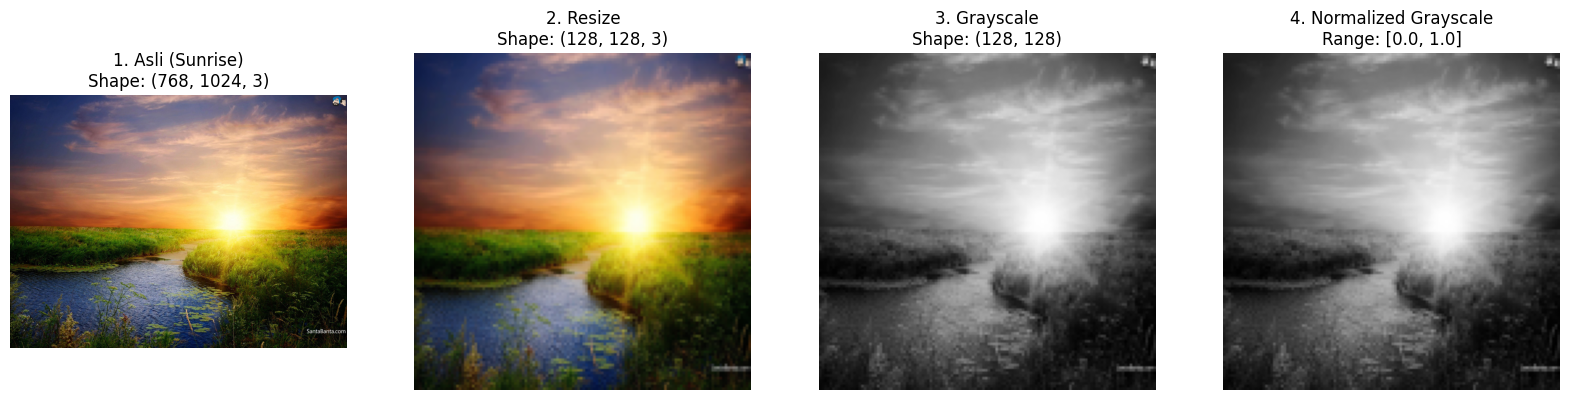

In [5]:
# Ambil satu gambar acak sebagai sampel
sample_index = random.randint(0, len(images) - 1)
sample_image = images[sample_index]
sample_label = CLASSES[labels[sample_index]]

# 1. Gambar Asli
original_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# 2. Resize Image
resized_img = resize_image(sample_image)
resized_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

# 3. Grayscale Conversion
gray_img = to_grayscale(resized_img)

# 4. Normalize Image
normalized_gray = normalize_image(gray_img)

# Visualisasi
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(original_rgb)
axes[0].set_title(f"1. Asli ({sample_label})\nShape: {sample_image.shape}")
axes[0].axis('off')

axes[1].imshow(resized_rgb)
axes[1].set_title(f"2. Resize\nShape: {resized_img.shape}")
axes[1].axis('off')

axes[2].imshow(gray_img, cmap='gray')
axes[2].set_title(f"3. Grayscale\nShape: {gray_img.shape}")
axes[2].axis('off')

axes[3].imshow(normalized_gray, cmap='gray')
axes[3].set_title(f"4. Normalized Grayscale\nRange: [{normalized_gray.min():.1f}, {normalized_gray.max():.1f}]")
axes[3].axis('off')

plt.show()